# Before you start :
   - These exercises are related to the Pivot table and correlation lessons.
   - Keep in mind that you need to use some of the functions you learned in the previous lessons.
   - All datasets are provided in the `your-code` folder of this lab.
   - Elaborate your codes and outputs as much as you can.
   - Try your best to answer the questions and complete the tasks and most importantly enjoy the process!!!

#### Import all the libraries that are necessary

In [68]:
import numpy as np
import pylab as plt
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Challenge 1

In [ ]:
df.pivot_table(index='fecha', columns='producto', values='cantidad', aggfunc='sum')

#### Open the ` Employee.csv` file and name your dataset `employee`

In [5]:
employee.columns=[e.lower().replace(' ', '_') for e in employee.columns]

In [2]:
employee = pd.read_csv('Employee.csv')
employee

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30
3,Sonia,HR,Bachelor,F,analyst,4,35
4,Samuel,Sales,Master,M,associate,3,55
5,Eva,Sales,Bachelor,F,associate,2,55
6,Carlos,IT,Master,M,VP,8,70
7,Pedro,IT,Phd,M,associate,7,60
8,Ana,HR,Master,F,VP,8,70


#### What's the mean salary by department. 
##### Tip : There are 2 ways to do it - one way is with and the other way is without pivot tables. Do it both ways. 


In [11]:
mean_salary_department = employee.pivot_table(index=['department'], values=['salary'], aggfunc='mean')

mean_salary_department

,salary
department,
HR,45.00
IT,48.75
Sales,55.00


In [12]:
mean_salary_department2 = employee.groupby('department')['salary'].mean()
mean_salary_department2

department
HR       45.00
IT       48.75
Sales    55.00
Name: salary, dtype: float64

#### We want now to group the data by more than one column. Use Pandas pivot table function to select the mean salary by department and title

In [17]:
mean_salary_department_title = employee.pivot_table(values = ['salary'], index = ['department', 'title'], aggfunc='mean')
mean_salary_department_title

salary
department title            
HR         VP           70.0
           analyst      32.5
IT         VP           70.0
           analyst      32.5
           associate    60.0
Sales      associate    55.0

#### We want to display the number of years of work experience and the salary for each Title. Add Years as a column in your pivot table
*Hint: Use Pandas doc(see References in README.md) to explore the pivot_table() arguments*

In [23]:
salary_year_title = employee.pivot_table(index = ['years'], columns = ['department'], values = ['salary'], aggfunc = 'mean')

salary_year_title

salary            
department     HR    IT Sales
years                        
1             NaN  35.0   NaN
2            30.0  30.0  55.0
3             NaN   NaN  55.0
4            35.0   NaN   NaN
7             NaN  60.0   NaN
8            70.0  70.0   NaN

#### We want to know the information about the mean salary and number of employees in each department and for each job title

In [21]:
mean_salary_num_employees = employee.pivot_table(index = ['title'], columns = ['department'], values = ['salary'], aggfunc = 'mean')

mean_salary_num_employees

salary            
department     HR    IT Sales
title                        
VP           70.0  70.0   NaN
analyst      32.5  32.5   NaN
associate     NaN  60.0  55.0

#### We want to know for each department and for each job title the Salary's median,minimum,maximum and standard deviation. Comment your results

In [28]:
salary_department_title = employee.pivot_table(index = ['title','department'], values = ['salary'], aggfunc = ['median', 'max', 'min', 'std'])

salary_department_title

# 

median    max    min       std
                     salary salary salary    salary
title     department                               
VP        HR           70.0     70     70       NaN
          IT           70.0     70     70       NaN
analyst   HR           32.5     35     30  3.535534
          IT           32.5     35     30  3.535534
associate IT           60.0     60     60       NaN
          Sales        55.0     55     55  0.000000

#### Based on your comments, fill the missing values with an appropriate value

In [29]:
salary_department_title.fillna(0.00)
# Relleno la desviacion tipica con 0, ya que el maximo y el minimo es el mismo..

median    max    min       std
                     salary salary salary    salary
title     department                               
VP        HR           70.0     70     70  0.000000
          IT           70.0     70     70  0.000000
analyst   HR           32.5     35     30  3.535534
          IT           32.5     35     30  3.535534
associate IT           60.0     60     60  0.000000
          Sales        55.0     55     55  0.000000

#### The stake holders want to know for each department the number of employees and how much money is spend on salaries. Could you provide that information? 

In [53]:
stake_holders = employee.pivot_table(index='department', values='salary', aggfunc=['count', 'sum'])
stake_holders

,count,sum
,salary,salary
department,,
HR,3,135
IT,4,195
Sales,2,110


#### For each Department and Title, we want to know the the total years of work experience and the mean salary

In [60]:
stake_holders2 = employee.pivot_table(index = ['department','title'], values = ['years','salary'], aggfunc = {'years': 'sum', 'salary': 'mean'})
stake_holders2

salary  years
department title                   
HR         VP           70.0      8
           analyst      32.5      6
IT         VP           70.0      8
           analyst      32.5      3
           associate    60.0      7
Sales      associate    55.0      5

#### Bonus

#### We now want to compute the mean salary after removing the maxima for each Department. Create the appropriate pivot table

#### * Hint: Write a custom function*

In [ ]:
# your answer here

In [ ]:
# your answer here

# Challenge 2

#### Open the ` Fitbit.csv` file and name your dataset `fitbit`

In [64]:
fitbit = pd.read_csv('Fitbit.csv')
fitbit.columns=[e.lower().replace(' ', '_') for e in fitbit.columns]
fitbit.head(1)

,date,calorie_burned,steps,distance,floors,minutes_sedentary,minutes_lightly_active,minutes_fairly_active,minutes_very_active,activity_calories,minutesofsleep,minutesofbeingawake,numberofawakings,lengthofrestinminutes
0,08-05-2015,1934,905,0.65,0,1.355,46,0,0,1680,384,26,23,417


#### Explore you dataset in terms of data types and descriptive statistics
#### *Hint: Use Pandas functions from previous lectures*

In [65]:
fitbit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   date                    367 non-null    object 
 1   calorie_burned          367 non-null    int64  
 2   steps                   367 non-null    int64  
 3   distance                367 non-null    float64
 4   floors                  367 non-null    int64  
 5   minutes_sedentary       367 non-null    float64
 6   minutes_lightly_active  367 non-null    int64  
 7   minutes_fairly_active   367 non-null    int64  
 8   minutes_very_active     367 non-null    int64  
 9   activity_calories       367 non-null    int64  
 10  minutesofsleep          367 non-null    int64  
 11  minutesofbeingawake     367 non-null    int64  
 12  numberofawakings        367 non-null    int64  
 13  lengthofrestinminutes   367 non-null    int64  
dtypes: float64(2), int64(11), object(1)
memory

In [66]:
fitbit.describe()

,calorie_burned,steps,distance,floors,minutes_sedentary,minutes_lightly_active,minutes_fairly_active,minutes_very_active,activity_calories,minutesofsleep,minutesofbeingawake,numberofawakings,lengthofrestinminutes
count,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000
mean,2741.501362,10121.588556,8.549128,11.724796,563.934482,236.405995,26.163488,35.722071,2044.147139,290.479564,28.008174,16.196185,321.343324
std,916.307036,5594.836225,3.409881,10.337370,294.793145,86.531376,20.319456,31.006682,2041.267168,154.752328,18.541415,10.757622,170.786726
min,179.000000,0.000000,0.000000,0.000000,1.002000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2698.000000,6730.500000,6.155000,5.000000,520.000000,179.000000,8.000000,10.500000,1218.500000,224.000000,14.000000,7.000000,248.000000
50%,2974.000000,10413.000000,8.290000,11.000000,663.000000,226.000000,24.000000,29.000000,1553.000000,337.000000,29.000000,16.000000,370.000000
75%,3233.000000,13916.500000,10.560000,16.000000,756.500000,290.000000,41.500000,54.000000,1927.500000,400.500000,41.500000,24.000000,440.500000
max,4351.000000,26444.000000,20.450000,101.000000,998.000000,472.000000,101.000000,153.000000,9830.000000,553.000000,78.000000,45.000000,607.000000


#### You suspect that there must be a linear relationship between the Minutes Very Active and the Steps. Compute the correlation between these variables.

In [67]:
correlation = fitbit['minutes_very_active'].corr(fitbit['steps'])
correlation

0.5714518481062606

#### Use matplotlib to visually plot Minutes Very active vs Steps. 

##### Hint : import matplotlib.pyplot as plt (See previous lessons)#####
- Use plt.scatter(x=df['col_name_1'], y=df['col_name_2'])

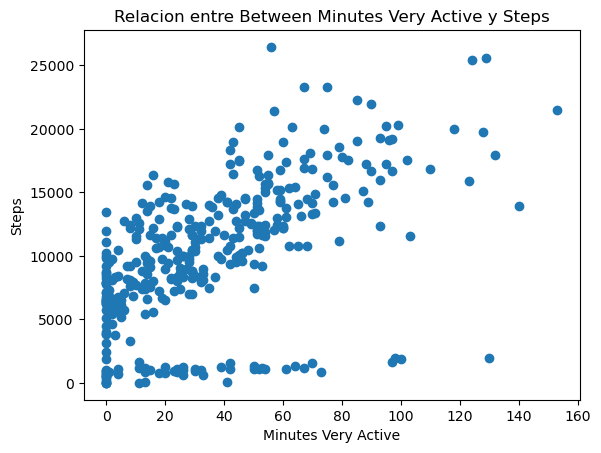

In [73]:
plt.scatter(x=fitbit['minutes_very_active'], y=fitbit['steps'])

# agregar etiquetas de los ejes y título
plt.xlabel('Minutes Very Active')
plt.ylabel('Steps')
plt.title('Relacion entre Between Minutes Very Active y Steps')

# mostrar el gráfico
plt.show()

#### What can you say about Minute Very Active and Steps? Write a comment below

In [ ]:
# your comment here

#### We also suspect that there must be a linear relationship between the Minutes Sedentary and the Steps. Compute the correlation between these variables.

In [74]:
correlation2 = fitbit['minutes_sedentary'].corr(fitbit['steps'])
correlation2

0.07690608062990097

#### Use matplotlib to visually plot Minutes Sedentary vs Steps. Based on the results of the computed correlation and the plot. What can you say about these 2 variables?

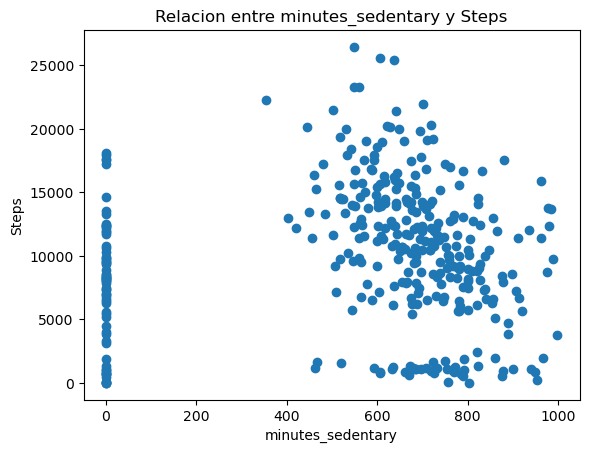

In [75]:
plt.scatter(x=fitbit['minutes_sedentary'], y=fitbit['steps'])

# agregar etiquetas de los ejes y título
plt.xlabel('minutes_sedentary')
plt.ylabel('Steps')
plt.title('Relacion entre minutes_sedentary y Steps')

# mostrar el gráfico
plt.show()

In [ ]:
# Your comment here

#### We also suspect that there must be a linear relationship between the MinutesOfSleep and the Steps. Compute the correlation between these variables.

In [77]:
correlation2 = fitbit['minutesofsleep'].corr(fitbit['steps'])
correlation2

0.13098565950836388

#### Use matplotlib to visually plot MinutesOfSleep vs Steps. Based on the results of the computed correlation and the plot. What can you say about these 2 variables?

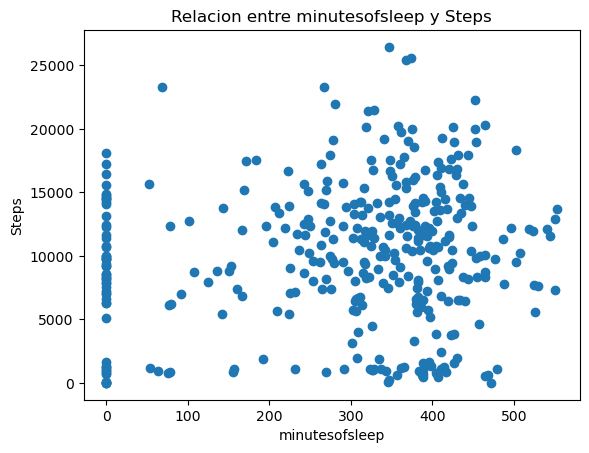

In [78]:
plt.scatter(x=fitbit['minutesofsleep'], y=fitbit['steps'])

# agregar etiquetas de los ejes y título
plt.xlabel('minutesofsleep')
plt.ylabel('Steps')
plt.title('Relacion entre minutesofsleep y Steps')

# mostrar el gráfico
plt.show()

#### Select a subset of your dataset with the columns below and compute the correlation matrix. Save the results in the variable `cor_fit`
column= ['Calorie burned', 'Steps','Floors','Minutes Sedentary','Minutes Very Active', 'MinutesOfSleep']

In [79]:
import scipy.stats as st

In [89]:
columns = ['calorie_burned', 'steps','floors','minutes_sedentary','minutes_very_active', 'minutesofsleep']

subset = fitbit.loc[:, columns]

In [90]:
# calcular la matriz de correlación
cor_fit = subset.corr()

# imprimir la matriz de correlación
cor_fit

,calorie_burned,steps,floors,minutes_sedentary,minutes_very_active,minutesofsleep
calorie_burned,1.000000,0.255305,0.130757,0.125353,0.197881,0.011485
steps,0.255305,1.000000,0.306511,0.076906,0.571452,0.130986
floors,0.130757,0.306511,1.000000,0.057812,0.399503,0.069464
minutes_sedentary,0.125353,0.076906,0.057812,1.000000,0.105963,0.204242
minutes_very_active,0.197881,0.571452,0.399503,0.105963,1.000000,0.108018
minutesofsleep,0.011485,0.130986,0.069464,0.204242,0.108018,1.000000


#### Based on the result of the correlation matrix. What are the highly correlated features with the variable Steps?
*Hint: From the results above select the variable Steps and order your results in descending order (use Pandas sort_values function)*

In [ ]:
# Lo siento, pero no lo estoy entendiendo ni con el chat. No tiene sentido copiar y pegar las soluciones

# Challenge 3

#### Open the `Time_Grades.csv` file and name your dataset `time_grades`

In [93]:
time_grades = pd.read_csv('Time_Grades.csv')
time_grades.columns=[e.lower().replace(' ', '_') for e in time_grades.columns]
time_grades

,name,study_time,grade
0,Jose,4,4
1,Maria,9,7
2,David,8,9
3,Sonia,10,7
4,Samuel,20,9
5,Eva,5,3
6,Carlos,12,7
7,Pedro,6,5
8,Ana,18,9
9,Gervasio,7,3


In [92]:
time_grades.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        15 non-null     object
 1   study_time  15 non-null     int64 
 2   grade       15 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 488.0+ bytes


#### Show visually the frequency distribution of the time_grades dataset.

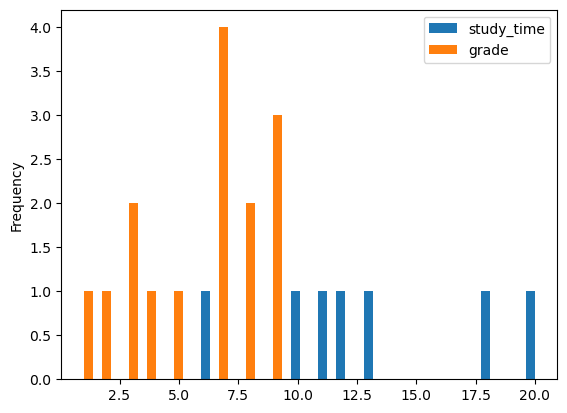

In [102]:
time_grades.plot.hist(bins=50);

#### Is there a correaltion between study time and Grade? Use both Pearson and Spearman correlation and comment your results.

In [98]:
pearson = st.pearsonr(time_grades.study_time, time_grades.grade)
pearson

PearsonRResult(statistic=0.7980456073578858, pvalue=0.0003627635256342731)

In [99]:
spearman = st.spearmanr(time_grades.study_time, time_grades.grade)
spearman

SpearmanrResult(correlation=0.819658753036942, pvalue=0.00018377469445788485)

#### Use matplotlib to visually plot Study time vs Grade. Based on the results of the computed correlation and the plot. What can you say about these 2 variables?

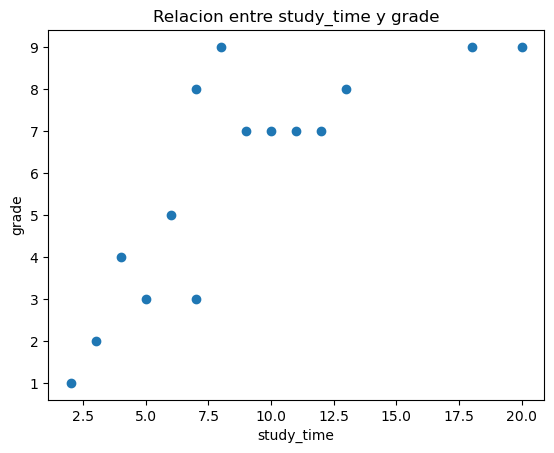

In [100]:
plt.scatter(x = time_grades.study_time, y = time_grades.grade)

# agregar etiquetas de los ejes y título
plt.xlabel('study_time')
plt.ylabel('grade')
plt.title('Relacion entre study_time y grade')

# mostrar el gráfico
plt.show()

In [ ]:
# Entiendo que existe una correlacion positiva entre los datos de las dos columnas.

#### Could you explain the difference between Pearson and Spearman correlation? (see References in README.md) 

La correlación de Pearson evalúa la relación lineal entre dos variables continuas y Spearmen no.

Un coeficiente de correlación de 1 indica una correlación positiva perfecta, 
un coeficiente de correlación de -1 indica una correlación negativa perfecta, 
y un coeficiente de correlación de 0 indica que no hay correlación lineal entre las variables.